In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import seaborn as sns



In [52]:
import os
import pandas as pd
from parse import parse

data = pd.read_csv(r"E:\21052962\minor\api_data (1).csv", encoding='latin1')
image_folder = r"test"

# Print the first few rows of the DataFrame to check the values in 'Icon'
print(data['Icon'].head())

# Update the image path column
data['Sports_image_path'] = data['Icon'].apply(lambda x: os.path.join(image_folder, x))

# Print the first few rows of the DataFrame again with the updated 'icon' column
print(data['Sports_image_path'].head())

review_path = r"C:\Users\swapn\Downloads\api_data_review.csv"
review_df = pd.read_csv(review_path, encoding='latin1')





0    https://rapidapi-prod-apis.s3.amazonaws.com/9c...
1    https://rapidapi-prod-apis.s3.amazonaws.com/9c...
2    https://rapidapi-prod-apis.s3.amazonaws.com/c3...
3    https://rapidapi-prod-apis.s3.amazonaws.com/9c...
4    https://rapidapi-prod-apis.s3.amazonaws.com/c3...
Name: Icon, dtype: object
0    test\https://rapidapi-prod-apis.s3.amazonaws.c...
1    test\https://rapidapi-prod-apis.s3.amazonaws.c...
2    test\https://rapidapi-prod-apis.s3.amazonaws.c...
3    test\https://rapidapi-prod-apis.s3.amazonaws.c...
4    test\https://rapidapi-prod-apis.s3.amazonaws.c...
Name: Sports_image_path, dtype: object


In [53]:
import pandas as pd

# Assuming 'api_data' is your dataset, replace it with the actual variable name
# Convert "Popularity" column to numeric
data["Popularity"] = pd.to_numeric(data["Popularity"], errors="coerce")

# Impute missing value in the "Popularity" column with the mean
popularity_mean = data["Popularity"].mean()
data["Popularity"] = data["Popularity"].fillna(popularity_mean)


# Verify that there are no more missing or NaN values
print(data.isnull().sum())
print(data.isna().sum())



Category                 41
Service Name              0
Description             950
Icon                      0
Service Level         96278
Popularity           191507
Latency               96278
Category URL              0
Service URL               0
Sports_image_path         0
dtype: int64
Category                 41
Service Name              0
Description             950
Icon                      0
Service Level         96278
Popularity           191507
Latency               96278
Category URL              0
Service URL               0
Sports_image_path         0
dtype: int64


In [54]:
print("Columns in data DataFrame:", data.columns)
print("Columns in review_df DataFrame:", review_df.columns)


Columns in data DataFrame: Index(['Category', 'Service Name', 'Description', 'Icon', 'Service Level',
       'Popularity', 'Latency', 'Category URL', 'Service URL',
       'Sports_image_path'],
      dtype='object')
Columns in review_df DataFrame: Index(['Category', 'Service Name', 'Description', 'Icon', 'Service Level',
       'Popularity', 'Latency', 'Category URL', 'Service URL'],
      dtype='object')


In [55]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data["Service URL"] = lb_make.fit_transform(data["Service Name"])
data["Category URL"] = lb_make.fit_transform(data["Category"])

data["Service URL"].value_counts()
data["Category URL"].value_counts()


Category URL
2015     2029
13647    1298
8055      971
13294     788
643       685
         ... 
10241       1
31          1
10152       1
8485        1
110         1
Name: count, Length: 13672, dtype: int64

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [57]:
data_train_path = 'train'
data_test_path = 'test'
data_val_path = 'validation'

In [58]:
img_width = 175
img_height =175 

In [59]:
data_train = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(img_width, img_height),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training'
)


Found 79 files belonging to 2 classes.
Using 64 files for training.


In [60]:
data_cat = data_train.class_names

In [61]:
data_cat

['finance', 'sports']

In [62]:
data_test = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(img_width, img_height),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training'
)

Found 47 files belonging to 2 classes.
Using 38 files for training.


In [63]:
data_cat = data_train.class_names

In [64]:
data_cat

['finance', 'sports']

In [65]:
data_val = tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(img_width, img_height),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training'
)

Found 47 files belonging to 2 classes.
Using 38 files for training.


In [66]:
data_cat = data_val.class_names

In [67]:
data_cat

['finance', 'sports']

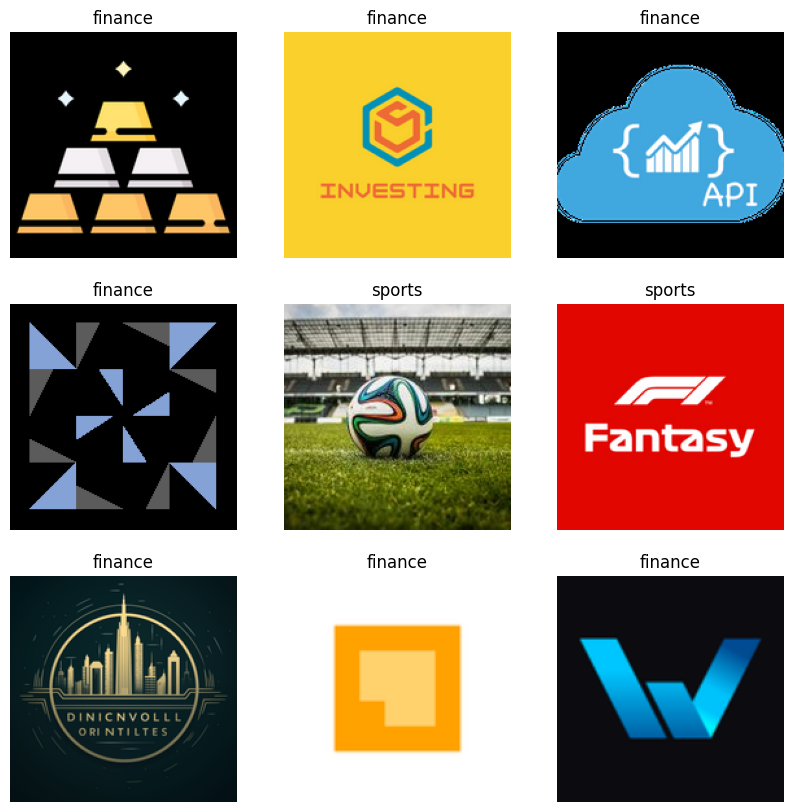

In [68]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [69]:
from tensorflow.keras.models import Sequential

In [70]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 175, 175, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [71]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [72]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [73]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 371ms/step - accuracy: 0.5625 - loss: 0.9264 - val_accuracy: 0.5526 - val_loss: 6.3274
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.4062 - loss: 4.7653 - val_accuracy: 0.5000 - val_loss: 1.1957
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.6250 - loss: 1.0255 - val_accuracy: 0.4474 - val_loss: 1.6658
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.6146 - loss: 0.8359 - val_accuracy: 0.8158 - val_loss: 0.5366
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.8333 - loss: 0.4385 - val_accuracy: 0.6579 - val_loss: 0.5114
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.6771 - loss: 0.5256 - val_accuracy: 0.8684 - val_loss: 0.4287
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.8750 - loss: 0.3830 - val_accuracy: 0.7632 - val_loss: 0.6530
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.8750 - loss: 0.3275 - val_accuracy: 0.8421 - val_loss:

In [79]:
image = 'finance.png'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [82]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [83]:
image = 'sports.png'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [84]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [85]:
score = tf.nn.softmax(predict)

In [86]:
print('Sport/Finance in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Sport/Finance in image is sports with accuracy of 99.44


In [87]:
model.save('Image_classify.keras')

In [88]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import streamlit as st


In [89]:
model = tf.keras.models.load_model('E:/21052962/minor/Image_classify.keras')

In [91]:
image_name = input('Enter Image name: ')


Enter Image name:  sports.png


In [96]:
image_path = 'E:/21052962/minor/' + 'sports.png'
image_load = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
img_arr = tf.keras.utils.img_to_array(image_load)
img_bat = np.expand_dims(img_arr, axis=0)


In [97]:
predict = model.predict(img_bat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the CSV file with 'latin1' encoding
data = pd.read_csv("api_data (1).csv", encoding='latin1')

# Assuming 'Category URL' column contains URLs and 'label' column contains labels
X = data['Category URL']
y = data['Service Name']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TfidfVectorizer to convert URLs into numerical features
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [100]:
from sklearn.metrics import confusion_matrix

# Assuming 'model' is your trained model and 'X_test_vec', 'y_test' are your test data and labels
y_pred = model.predict(X_test_vec)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[1028    0    0 ...    0    0    0]
 [   0 1486    0 ...    0    0    0]
 [   0    0 2417 ...    0    0    0]
 ...
 [   0    0    0 ...  812    0    0]
 [   0    0    0 ...    0  441    0]
 [   0    0    0 ...    0    0 1777]]


C:\Users\swapn\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\swapn\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\swapn\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\swapn\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


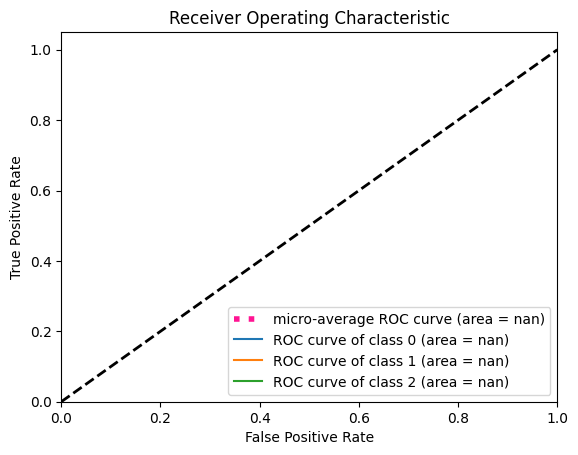

In [106]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the labels for each class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Assuming 3 classes
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])  # Assuming 3 classes

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

for i in range(3):  # Assuming 3 classes
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


C:\Users\swapn\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\swapn\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\swapn\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_ranking.py:993: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


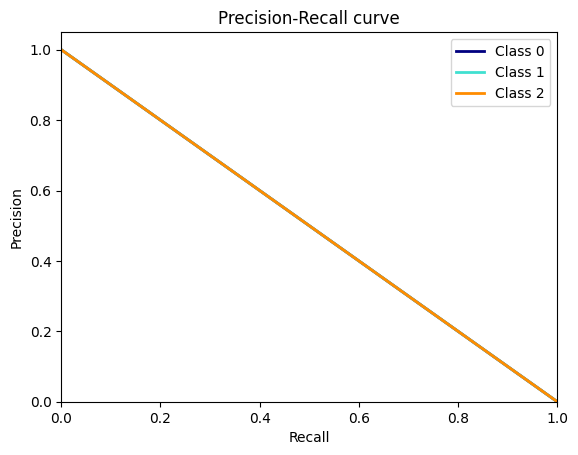

In [108]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the labels for each class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Assuming 3 classes
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])  # Assuming 3 classes

# Compute precision-recall pairs for each class
precision = dict()
recall = dict()
for i in range(3):  # Assuming 3 classes
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_bin[:, i])

# Plot precision-recall curve for each class
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
for i, color in zip(range(3), colors):  # Assuming 3 classes
    plt.plot(recall[i], precision[i], color=color, lw=2, label='Class {0}'.format(i))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Precision-Recall curve')
plt.legend(loc="best")
plt.show()


In [111]:
from sklearn.metrics import f1_score

# Calculate the F1 score using 'micro' averaging
f1_micro = f1_score(y_test, y_pred, average='micro')
print("F1 Score (Micro):", f1_micro)

# Calculate the F1 score using 'macro' averaging
f1_macro = f1_score(y_test, y_pred, average='macro')
print("F1 Score (Macro):", f1_macro)

# Calculate the F1 score using 'weighted' averaging
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print("F1 Score (Weighted):", f1_weighted)


F1 Score (Micro): 1.0
F1 Score (Macro): 1.0
F1 Score (Weighted): 1.0
